In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
def score_model(model, x, y, n_splits=10, n_repeats=10):
    scoring = "neg_root_mean_squared_error"
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=seed)
    scores = cross_val_score(model, x, y, scoring=scoring, cv=cv, n_jobs=-1)
    return scores

In [3]:
def plot_predictions(linreg_model, df, index, x, y):
    d = df["Data/Hora"].values
    test_series = pd.DataFrame({"ccs28": y}, index=pd.to_datetime(d))
    pred_series = linreg_model.predict(scaler.transform(x))
    pred_series = pd.DataFrame({"ccs28-pred": pred_series}, index=pd.to_datetime(d))

    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))

    test_series.plot(ax=ax)
    ax.axvline(test_series.index[index], color="r")  # end of train dataset
    pred_series[index:].plot(ax=ax)
    ax.grid(which="both")
    ax.legend(
        ["train and test series", "end of train series", "predicted"], loc="upper left"
    )
    # ax.set_xlabel('Period', labelpad=20, fontsize=15)
    ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
    plt.show()

In [4]:
def plot_scores_box_plot(scores, repeats, n_splits):
    plt.figure(figsize=(15, 8))
    plt.boxplot(
        scores.reshape((repeats, n_splits)),
        labels=[str(r) for r in range(1, repeats + 1)],
        showmeans=True,
    )
    plt.ylabel("RMSE", labelpad=20, fontsize=15)
    plt.xlabel("Repeats", labelpad=20, fontsize=15)
    plt.show()

In [5]:
df_r3d_and_r7d = pd.read_csv(
    "../../../../data/interim/"
    + "r3d_and_r7d-no-resampling-with-fillna-and-fft-all-vars-kept-"
    + "dados-historicos-partner_i-cement-CPIIF40.csv"
)
df_r3d_only = pd.read_csv(
    "../../../../data/interim/"
    + "r3d_only-no-resampling-with-fillna-and-fft-all-vars-kept-"
    + "dados-historicos-partner_i-cement-CPIIF40.csv"
)
df_no_r3d_r7d = pd.read_csv(
    "../../../../data/interim/"
    + "no-r3d-r7d-no-resampling-with-fillna-and-fft-all-vars-kept-"
    + "dados-historicos-partner_i-cement-CPIIF40.csv"
)

# FFT Transform

This notebook contains that experiments with the data transformed with fast fourier transform.

# Linear Regression

In [6]:
seed = 47
scaler = StandardScaler()
repeats = 10
n_splits = 10
linreg_model = LinearRegression()
pipeline = Pipeline([('transformer', scaler), ('estimator', linreg_model)])

# Repeated KFold Cross validation

<h3>Experiment 1</h3>
<h4> Repeated KFold Cross Validation - r3d_and_r7d-no-resampling-with-fillna</h4>

<b>Dataset: df_no_r3d_r7d:</b> In this dataset the R3D and R7D variables are not considered.

In [7]:
y = df_no_r3d_r7d.pop('R28D').values
x = df_no_r3d_r7d.drop(['Data/Hora'], axis=1).values

In [8]:
cv = RepeatedKFold(n_splits=n_splits, n_repeats=repeats, random_state=seed)
scores = cross_val_score(pipeline, x, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
scores = np.abs(scores)
print('RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

RMSE: 1.989 (0.265)


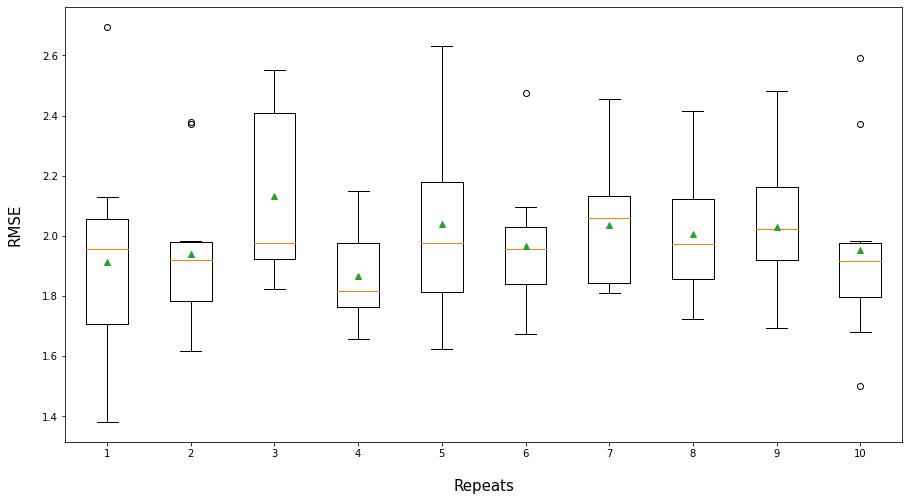

In [9]:
plot_scores_box_plot(scores, repeats, n_splits)

<h3>Experiment 2</h3>
<h4> Repeated KFold Cross Validation - df_r3d-only</h4>

<b>Dataset: df_r3d-only:</b> In this dataset the R7D variable is not considered.

In [10]:
y = df_r3d_only.pop('R28D').values
x = df_r3d_only.drop(['Data/Hora'], axis=1).values

In [11]:
cv = RepeatedKFold(n_splits=n_splits, n_repeats=repeats, random_state=seed)
scores = cross_val_score(pipeline, x, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
scores = np.abs(scores)
print('RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

RMSE: 1.773 (0.305)


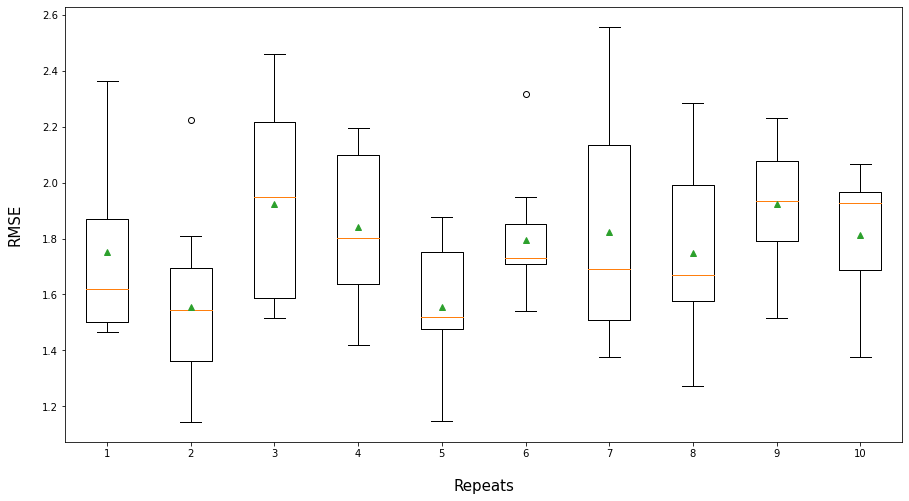

In [12]:
plot_scores_box_plot(scores, repeats, n_splits)

<h3>Experiment 3</h3>
<h4> Repeated KFold Cross Validation - df_r3d-and-rd7</h4>

<b>Dataset: df_r3d_and_r7d:</b> In this dataset both R3D and R7D variables are considered.

In [13]:
y = df_r3d_and_r7d.pop('R28D').values
x = df_r3d_and_r7d.drop(['Data/Hora'], axis=1).values

In [14]:
cv = RepeatedKFold(n_splits=n_splits, n_repeats=repeats, random_state=seed)
scores = cross_val_score(pipeline, x, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
scores = np.abs(scores)
print('RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

RMSE: 1.557 (0.228)


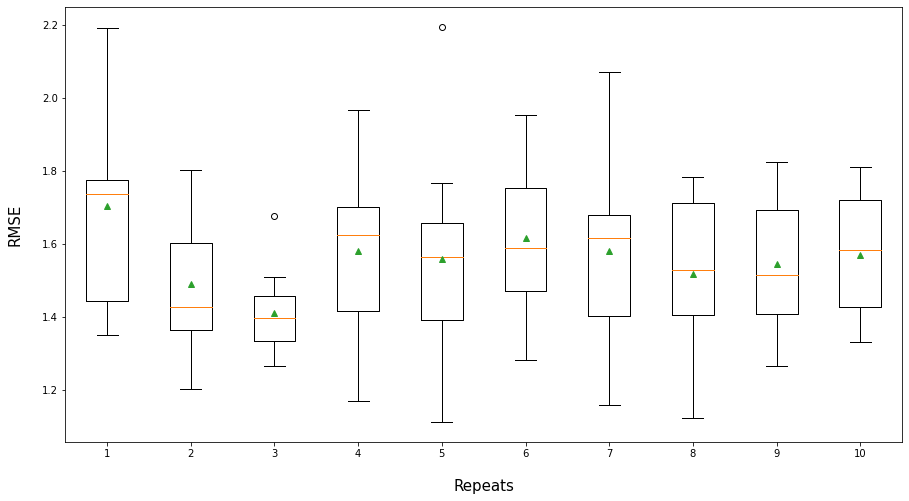

In [15]:
plot_scores_box_plot(scores, repeats, n_splits)